   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

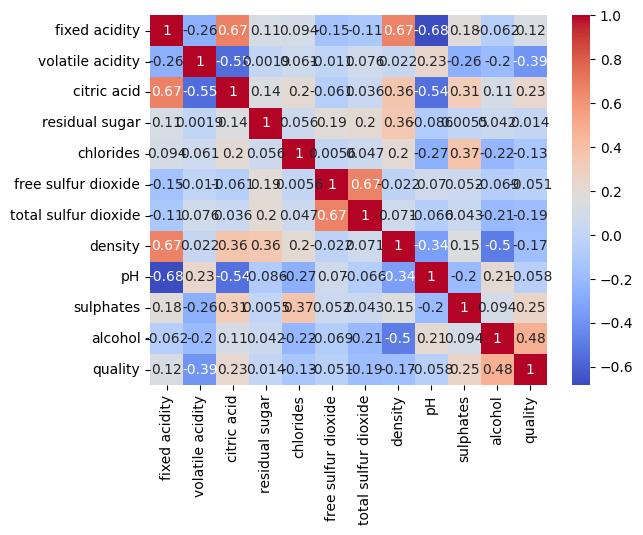

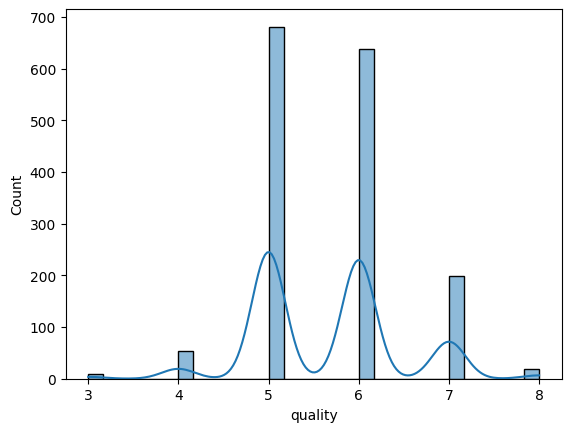

Mean Squared Error: 0.3006603124999999
Root Mean Squared Error: 0.5483250062690921
R-squared: 0.5399271357910311
Feature Importance:
                  Feature  Importance
10               alcohol    0.270868
9              sulphates    0.148406
1       volatile acidity    0.111547
6   total sulfur dioxide    0.076786
4              chlorides    0.071132
8                     pH    0.061418
3         residual sugar    0.057892
0          fixed acidity    0.053186
7                density    0.050816
2            citric acid    0.050752
5    free sulfur dioxide    0.047197


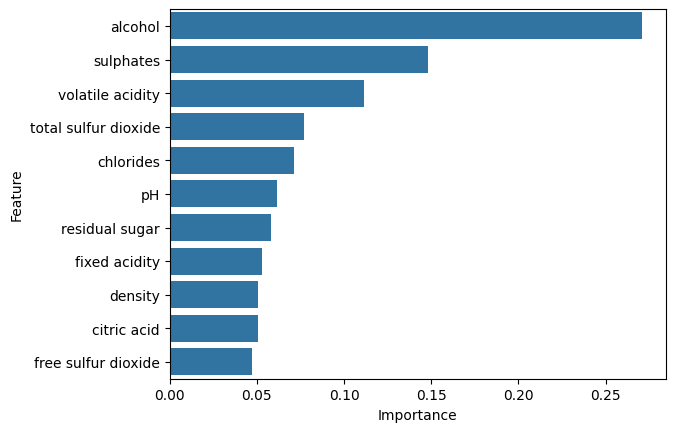

In [ ]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Loading the Dataset
# Assuming the dataset is in a CSV file named 'wine_quality.csv'
df = pd.read_csv('winequality.csv')

# 3. Data Exploration
# View the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data Summary Statistics
print(df.describe())

# Visualizing correlations between features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 4. Feature Engineering
# Let's assume 'quality' is the target variable.
# You may want to examine the distribution of wine quality.
sns.histplot(df['quality'], kde=True)
plt.show()

# 5. Data Preprocessing
# Split the dataset into features (X) and target (y)
X = df.drop('quality', axis=1)  # All columns except 'quality'
y = df['quality']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Building the Machine Learning Model
# Using Random Forest Regressor for wine quality prediction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# 7. Model Evaluation
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# 8. Creative Insights for Decision Makers
# Identify feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Visualize the feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.show()

# 9. Insights for Decision Makers:
# Decision makers can use this feature importance to prioritize production aspects.
# For example, if 'alcohol' and 'pH' are highly important, focusing on these during production could improve wine quality.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict wine quality
y_pred_lr = lr_model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Absolute Error: {mae}')
print(f'Linear Regression R-squared: {r2_lr}')


Linear Regression Mean Absolute Error: 0.5035304415524375
Linear Regression R-squared: 0.403180341279622


Decision Tree Mean Squared Error: 0.6125
Decision Tree R-squared: 0.06274750070981339


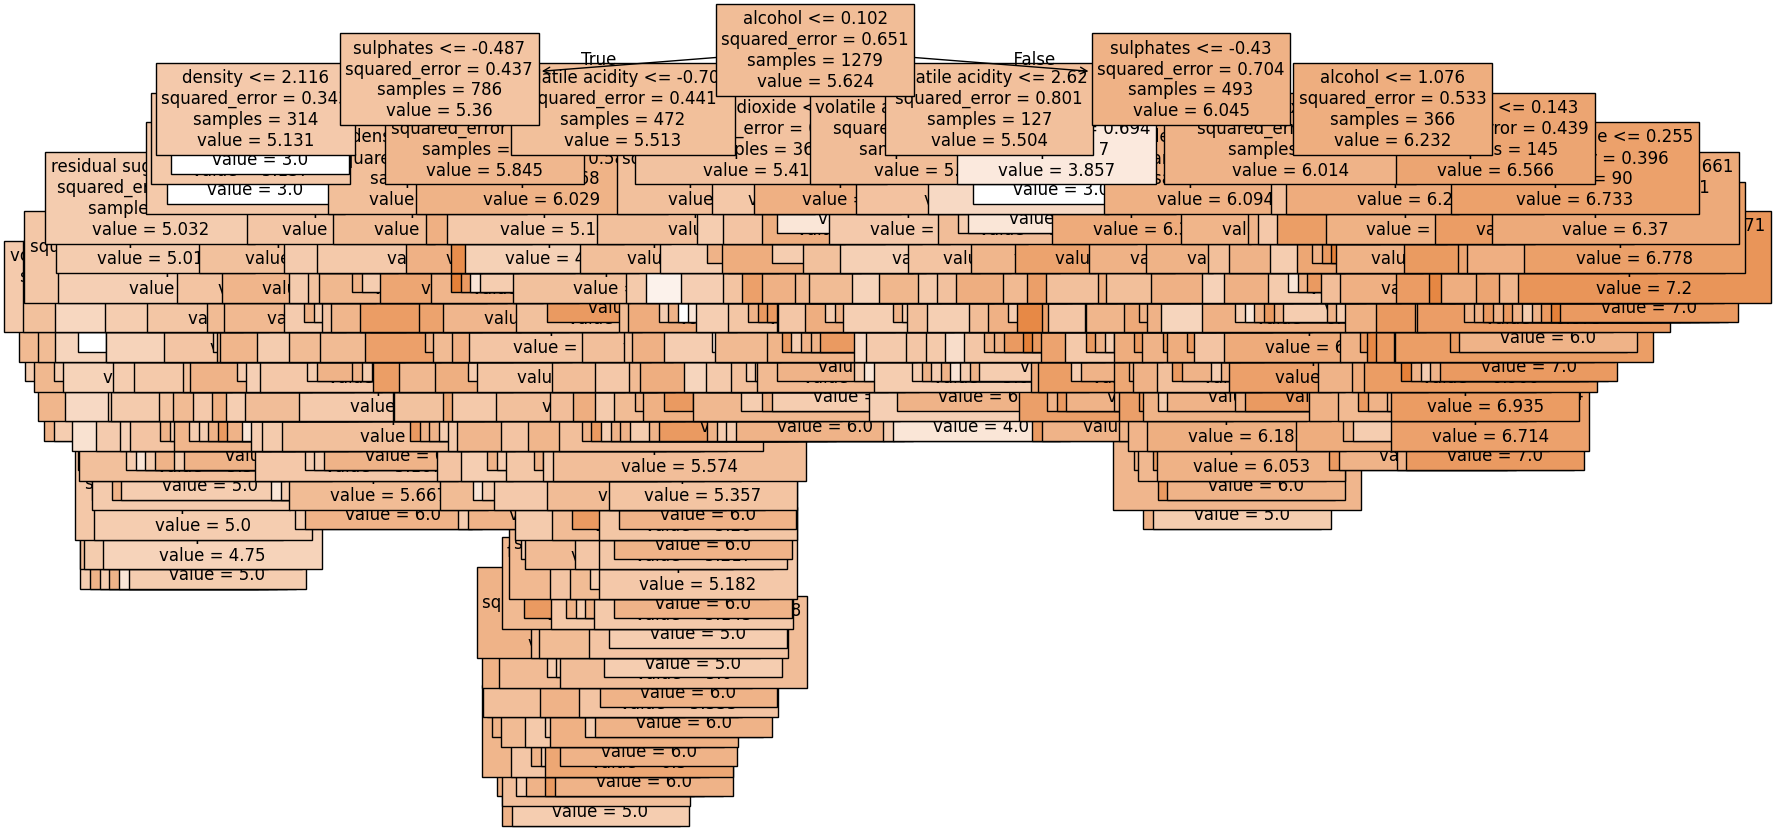

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Train Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict wine quality
y_pred_dt = dt_model.predict(X_test_scaled)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')

# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, fontsize=12)
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train Support Vector Regressor model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Predict wine quality
y_pred_svm = svm_model.predict(X_test_scaled)

# Model Evaluation
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM Mean Squared Error: {mse_svm}')
print(f'SVM R-squared: {r2_svm}')


SVM Mean Squared Error: 0.3966341988523216
SVM R-squared: 0.3930671115456338


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Train K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict wine quality
y_pred_knn = knn_model.predict(X_test_scaled)

# Model Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN Mean Squared Error: {mse_knn}')
print(f'KNN R-squared: {r2_knn}')


KNN Mean Squared Error: 0.434875
KNN R-squared: 0.3345507255039676


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict wine quality
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Model Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

# Feature importance
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importance:\n", xgb_importance)


XGBoost Mean Squared Error: 0.35126441717147827
XGBoost R-squared: 0.4624922275543213
XGBoost Feature Importance:
                  Feature  Importance
10               alcohol    0.344627
9              sulphates    0.166045
6   total sulfur dioxide    0.068653
1       volatile acidity    0.068278
5    free sulfur dioxide    0.060968
8                     pH    0.060367
4              chlorides    0.057797
2            citric acid    0.049740
3         residual sugar    0.046960
7                density    0.044003
0          fixed acidity    0.032561


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Train MLP Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict wine quality
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Model Evaluation
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Mean Squared Error: {mse_mlp}')
print(f'MLP R-squared: {r2_mlp}')


MLP Mean Squared Error: 0.3745050572932157
MLP R-squared: 0.4269293045797863


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


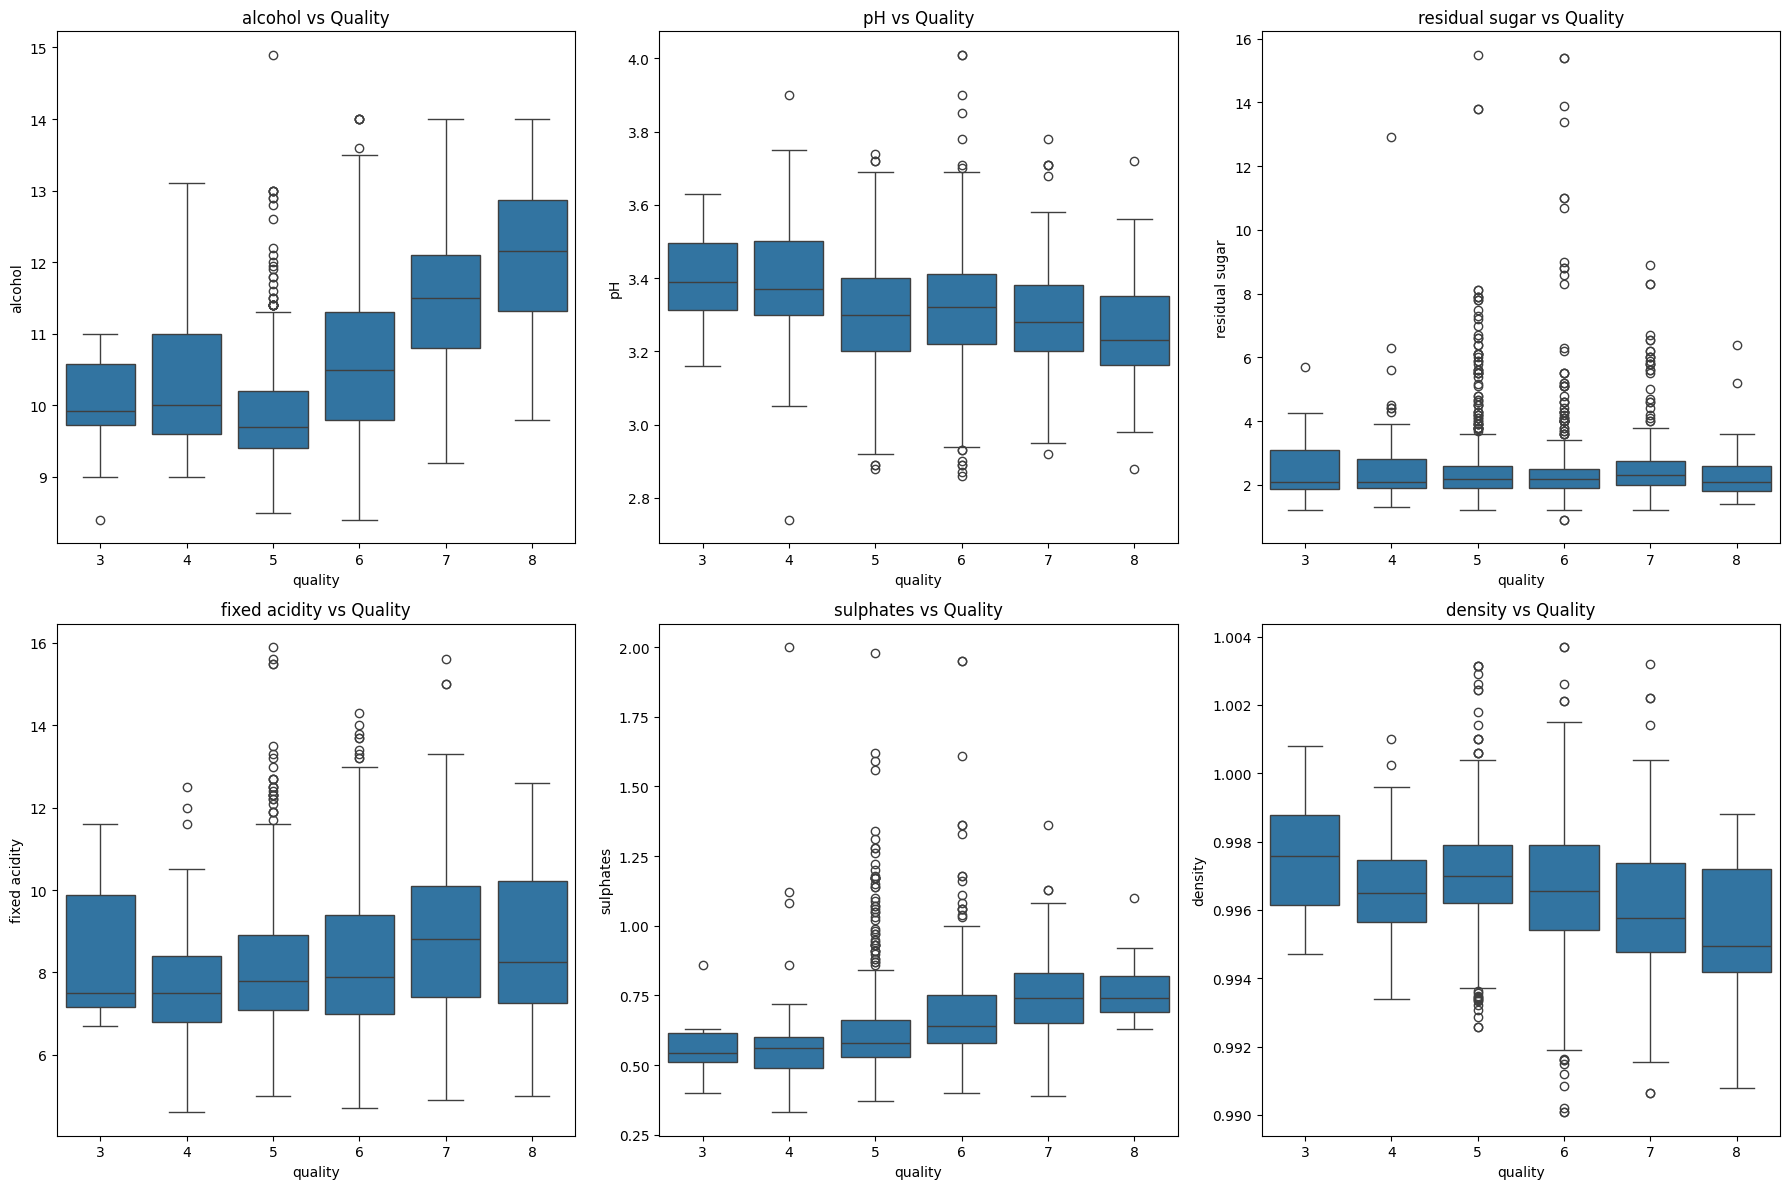

In [ ]:
# Visualizing the relationship between features and wine quality
features = ['alcohol', 'pH', 'residual sugar', 'fixed acidity', 'sulphates', 'density']

# Creating subplots for each feature to see their relationship with quality
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} vs Quality')

plt.tight_layout()
plt.show()


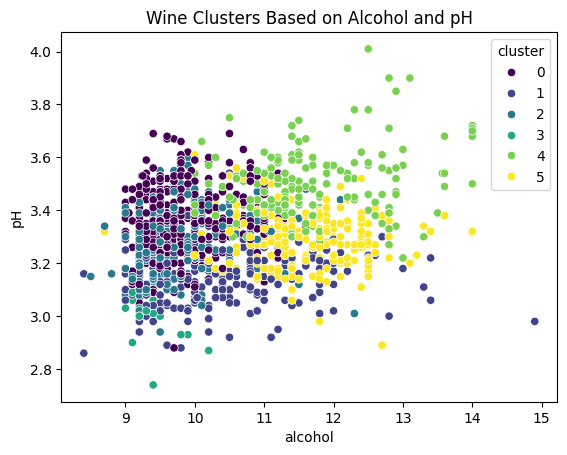

cluster  quality
0        5          289
         6          171
         4           30
         7           18
         3            7
1        6          132
         5           88
         7           55
         4            5
         8            5
         3            2
2        5          228
         6           94
         7           11
         4            5
         3            1
3        5           17
         6            9
         4            1
         7            1
4        6          115
         5           37
         7           27
         4           10
         8            4
5        6          117
         7           87
         5           22
         8            9
         4            2
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters with respect to quality
sns.scatterplot(x='alcohol', y='pH', hue='cluster', data=df, palette='viridis')
plt.title("Wine Clusters Based on Alcohol and pH")
plt.show()

# Check cluster distribution across wine quality
print(df.groupby('cluster')['quality'].value_counts())


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Base models
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = LinearRegression()
model3 = SVR(kernel='linear')

# Voting Regressor combining the models
voting_model = VotingRegressor(estimators=[('rf', model1), ('lr', model2), ('svm', model3)])
voting_model.fit(X_train_scaled, y_train)

# Predicting wine quality
y_pred_voting = voting_model.predict(X_test_scaled)

# Evaluating the ensemble model
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f'Voting Classifier Mean Squared Error: {mse_voting}')
print(f'Voting Classifier R-squared: {r2_voting}')


Voting Classifier Mean Squared Error: 0.33806337725322255
Voting Classifier R-squared: 0.48269266081785467


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Convert wine quality to categorical (e.g., Low, Medium, High)
df['quality_category'] = pd.cut(df['quality'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Features and target
X = df.drop(['quality', 'quality_category'], axis=1)
y = df['quality_category']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predicting wine quality categories
y_pred_cat = rf_classifier.predict(X_test_scaled)

# Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cat))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00         5
         Low       0.76      0.73      0.74       141
      Medium       0.77      0.80      0.78       174

    accuracy                           0.76       320
   macro avg       0.51      0.51      0.51       320
weighted avg       0.75      0.76      0.75       320



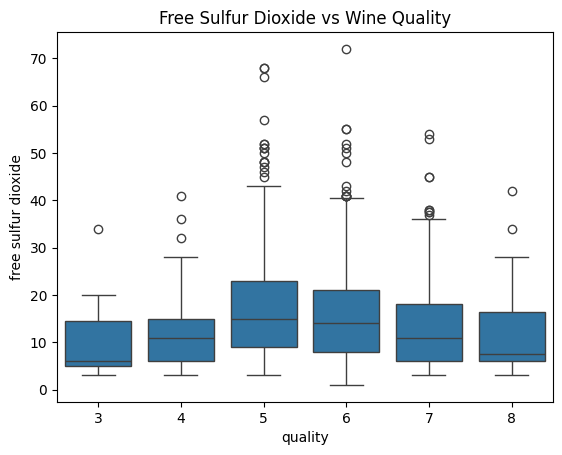

Correlation between Wine Quality and Free Sulfur Dioxide:
                      quality  free sulfur dioxide
quality              1.000000            -0.050656
free sulfur dioxide -0.050656             1.000000


In [ ]:
# Visualizing sulfur dioxide levels vs wine quality
sns.boxplot(x='quality', y='free sulfur dioxide', data=df)
plt.title('Free Sulfur Dioxide vs Wine Quality')
plt.show()

# Correlation analysis
sulfur_corr = df[['quality', 'free sulfur dioxide']].corr()
print(f"Correlation between Wine Quality and Free Sulfur Dioxide:\n{sulfur_corr}")
